<a href="https://colab.research.google.com/github/juankchb/Cython-Python/blob/main/Codigos/capturar_Rostro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Codigos/capturar_Rostro.ipynb

#Bibliotecas

In [2]:
import cv2
import os
import imutils
import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!git clone https://github.com/juankchb/Reconocimiento_facial.git

Cloning into 'Reconocimiento_facial'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 144 (delta 19), reused 1 (delta 1), pack-reused 92
Receiving objects: 100% (144/144), 3.74 MiB | 22.41 MiB/s, done.
Resolving deltas: 100% (27/27), done.


#Capturar rostros de videos

In [4]:
# Directorio de datos
dataPath = '/content/Reconocimiento_facial/Imagenes'

# Obtiene la lista de nombres de persona a partir de las carpetas en dataPath
personNames = [name for name in os.listdir(dataPath) if os.path.isdir(os.path.join(dataPath, name))]

# Directorio que contiene los videos
videos_dir = '/content/Reconocimiento_facial/Videos_deteccion_rostro/'

faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Bucle for para procesar cada persona
for personName in personNames:
    # Ruta completa a la carpeta de la persona
    personPath = os.path.join(dataPath, personName)

    # Comprueba si la carpeta de la persona existe, si no, la crea
    if not os.path.exists(personPath):
        print('Carpeta creada:', personPath)
        os.makedirs(personPath)

    # Nombre del video correspondiente a la persona
    video_name = f'{personName}.mp4'
    video_path = os.path.join(videos_dir, video_name)

    # Verifica si el video existe antes de procesarlo
    if os.path.exists(video_path):
        # Abre el archivo de video
        cap = cv2.VideoCapture(video_path)

        # Inicializa el contador para las imágenes capturadas
        count = 0

        while True:
            ret, frame = cap.read()
            if not ret:
                break

            frame = imutils.resize(frame, width=640)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            auxFrame = frame.copy()
            faces = faceClassif.detectMultiScale(gray, 1.3, 5)

            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                rostro = auxFrame[y:y + h, x:x + w]
                # Redimensiona la imagen del rostro a 150x150 píxeles
                rostro = cv2.resize(rostro, (150, 150), interpolation=cv2.INTER_CUBIC)
                # Guarda la imagen en escala de grises
                cv2.imwrite(os.path.join(personPath, f'{personName}_rostro_{count}.jpg'), rostro, [cv2.IMWRITE_JPEG_QUALITY, 100])
                count += 1

            k = cv2.waitKey(1)
            if k == 27 or count >= 301:
                break

        cap.release()

cv2.destroyAllWindows()

#Entrenar_Red_N

In [5]:
# Directorio de datos
dataPath = '/content/Reconocimiento_facial/Imagenes'

# Obtiene la lista de nombres de persona a partir de las carpetas en dataPath
personNames = [name for name in os.listdir(dataPath) if os.path.isdir(os.path.join(dataPath, name))]

# Directorio que contiene los videos
videos_dir = '/content/Reconocimiento_facial/Videos_deteccion_rostro/'

# Utiliza glob para obtener la lista de archivos de video en el directorio
video_files = glob.glob(os.path.join(videos_dir, '*.mp4'))

faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Listas para almacenar las imágenes de rostros y las etiquetas (nombres)
facesData = []
labels = []

# Bucle for para procesar cada persona
for personName in personNames:
    # Ruta completa a la carpeta de la persona
    personPath = os.path.join(dataPath, personName)

    # Nombre del video correspondiente a la persona
    video_name = f'{personName}.mp4'
    video_path = os.path.join(videos_dir, video_name)

    # Verifica si el video existe antes de procesarlo
    if os.path.exists(video_path):
        # Abre el archivo de video
        cap = cv2.VideoCapture(video_path)

        while True:
            ret, frame = cap.read()
            if not ret:
                break

            frame = imutils.resize(frame, width=640)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Convierte a escala de grises
            auxFrame = frame.copy()
            faces = faceClassif.detectMultiScale(gray, 1.3, 5)

            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                rostro = auxFrame[y:y + h, x:x + w]
                # Redimensiona la imagen del rostro a 150x150 píxeles
                rostro = cv2.resize(rostro, (150, 150), interpolation=cv2.INTER_CUBIC)
                # Convierte la imagen a escala de grises
                rostro = cv2.cvtColor(rostro, cv2.COLOR_BGR2GRAY)
                # Agrega la imagen redimensionada a la lista
                facesData.append(rostro)
                # Usa el nombre de la persona como etiqueta
                labels.append(personName)

        cap.release()

# Convertir los nombres de persona a números únicos
label_ids = {name: idx for idx, name in enumerate(set(labels))}
labels = [label_ids[name] for name in labels]
labels = np.array(labels, dtype=np.int32)

# Entrenar el reconocedor de rostros
face_recognizer = cv2.face_LBPHFaceRecognizer.create()
print("Entrenando el reconocedor de rostros...")
face_recognizer.train(facesData, labels)

# Almacenar el modelo entrenado
model_path = '/content/modeloLBPHFace.xml'
face_recognizer.save(model_path)
print(f"Modelo almacenado en {model_path}")

Entrenando el reconocedor de rostros...
Modelo almacenado en /content/modeloLBPHFace.xml


#Reconocimiento Facial

imagePaths= ['Juan_rostro_226.jpg', 'Juan_rostro_265.jpg', 'Juan_rostro_288.jpg', 'Juan_rostro_237.jpg', 'Juan_rostro_172.jpg', 'Juan_rostro_266.jpg', 'Juan_rostro_82.jpg', 'Juan_rostro_201.jpg', 'Juan_rostro_106.jpg', 'Juan_rostro_127.jpg', 'Juan_rostro_164.jpg', 'Juan_rostro_141.jpg', 'Juan_rostro_216.jpg', 'Juan_rostro_111.jpg', 'Juan_rostro_215.jpg', 'Juan_rostro_56.jpg', 'Juan_rostro_13.jpg', 'Juan_rostro_248.jpg', 'Juan_rostro_117.jpg', 'Juan_rostro_178.jpg', 'Juan_rostro_48.jpg', 'Juan_rostro_28.jpg', 'Juan_rostro_273.jpg', 'Juan_rostro_134.jpg', 'Juan_rostro_139.jpg', 'Juan_rostro_49.jpg', 'Juan_rostro_87.jpg', 'Juan_rostro_63.jpg', 'Juan_rostro_247.jpg', 'Juan_rostro_86.jpg', 'Juan_rostro_218.jpg', 'Juan_rostro_146.jpg', 'Juan_rostro_10.jpg', 'Juan_rostro_68.jpg', 'Juan_rostro_121.jpg', 'Juan_rostro_282.jpg', 'Juan_rostro_264.jpg', 'Juan_rostro_21.jpg', 'Juan_rostro_190.jpg', 'Juan_rostro_210.jpg', 'Juan_rostro_2.jpg', 'Juan_rostro_174.jpg', 'Juan_rostro_276.jpg', 'Juan_rostro

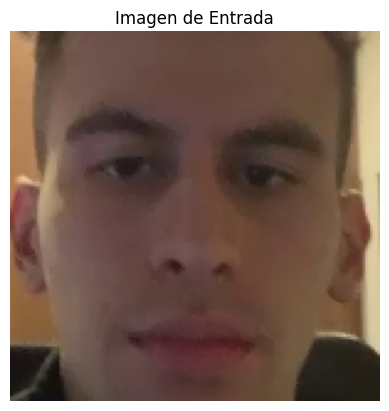

In [6]:
dataPath = '/content/Reconocimiento_facial/Imagenes/Juan'
imagePaths = os.listdir(dataPath)
print('imagePaths=', imagePaths)

face_recognizer = cv2.face_LBPHFaceRecognizer.create()
face_recognizer.read('modeloLBPHFace.xml')

cap = cv2.VideoCapture(0)  # Abre la cámara en tiempo real, cambia a 'Video.mp4' para cargar un video

faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while True:
    ret, frame = cap.read()
    if ret == False:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    auxFrame = gray.copy()

    faces = faceClassif.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        rostro = auxFrame[y:y + h, x:x + w]
        rostro = cv2.resize(rostro, (150, 150), interpolation=cv2.INTER_CUBIC)
        result = face_recognizer.predict(rostro)

        cv2.putText(frame, '{}'.format(result[0]), (x, y - 5), 1, 1.3, (255, 255, 0), 1, cv2.LINE_AA)

        if result[1] < 70:  # Ajusta este umbral según tu modelo
            cv2.putText(frame, '{}'.format(imagePaths[result[0]]), (x, y - 25), 2, 1.1, (0, 255, 0), 1, cv2.LINE_AA)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        else:
            cv2.putText(frame, 'Desconocido', (x, y - 20), 2, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

    cv2.imshow('frame', frame)
    k = cv2.waitKey(1)
    if k == 27:
        break

# Leer una imagen de entrada
input_image_path = '/content/Reconocimiento_facial/Imagenes/Juan/Juan_rostro_0.jpg'
input_image = cv2.imread(input_image_path)
input_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image_display = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)  # Para mostrar con matplotlib

# Realizar la comparación de la imagen de entrada con los rostros de referencia
result = face_recognizer.predict(input_gray)

# Convertir los nombres de persona a números únicos
label_names = list(label_ids.keys())
label_ids_inverse = {v: k for k, v in label_ids.items()}

# Determinar si la imagen de entrada se parece a alguien en la base de datos
if result[1] < 70:  # Ajusta este umbral según tu modelo
    match_person_name = label_ids_inverse[result[0]]
    similarity = 100 - result[1]
    print(f"La imagen se parece a {match_person_name} con una similitud del {similarity}%")
else:
    print("La imagen no se parece a ninguna persona en la base de datos.")

# Mostrar la imagen de entrada con el resultado
plt.imshow(input_image_display)
plt.title("Imagen de Entrada")
plt.axis("off")
plt.show()

#Manual

Bibliotecas

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

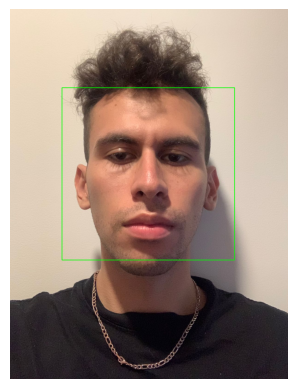

In [8]:
# Convertir la imagen a escala de grises
image=cv2.imread('/content/Reconocimiento_facial/Imagenes_Manual/JuanSinGafas.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Cargar el clasificador de cascada preentrenado para la detección de rostros
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detectar caras en la imagen
detected_faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Dibujar rectángulos alrededor de las caras detectadas
image_with_faces = image.copy()
for (x, y, w, h) in detected_faces:
    cv2.rectangle(image_with_faces, (x, y), (x + w, y + h), (0, 255, 0), 2)

image_with_faces_rgb = cv2.cvtColor(image_with_faces, cv2.COLOR_BGR2RGB)

plt.imshow(image_with_faces_rgb)
plt.axis('off')
plt.show()

Utilizando preprocesamiento de imagenes

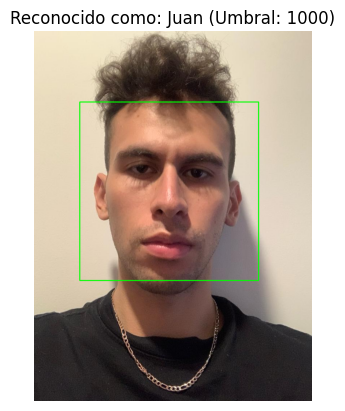

228.63080532477574


In [22]:
database = {
    "Juan": [],
    "Jepher": [],
    "Sebas": [],
}
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
def extract_features_manual(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) > 0:
        x, y, w, h = faces[0]
        face = image[y:y + h, x:x + w]

        desired_face_width = 256
        desired_face_height = 256
        aligned_face = cv2.resize(face, (desired_face_width, desired_face_height))

        # Convierte el rostro alineado a escala de grises
        aligned_face_gray = cv2.cvtColor(aligned_face, cv2.COLOR_BGR2GRAY)

        # Calcular los gradientes en las direcciones x e y
        gradient_x = cv2.Sobel(aligned_face_gray, cv2.CV_64F, 1, 0, ksize=1)
        gradient_y = cv2.Sobel(aligned_face_gray, cv2.CV_64F, 0, 1, ksize=1)

        # Calcular la magnitud y la dirección del gradiente
        magnitude, angle = cv2.cartToPolar(gradient_x, gradient_y)

        bins = 20
        cell_size = 4

        cells_x = aligned_face_gray.shape[1] // cell_size
        cells_y = aligned_face_gray.shape[0] // cell_size
        magnitude = magnitude[:cells_y * cell_size, :cells_x * cell_size]
        angle = angle[:cells_y * cell_size, :cells_x * cell_size]

        # Realiza el resto del cálculo del histograma
        cell_magnitudes = np.split(magnitude, cells_y, axis=0)
        cell_magnitudes = [np.split(row, cells_x, axis=1) for row in cell_magnitudes]

        cell_angles = np.split(angle, cells_y, axis=0)
        cell_angles = [np.split(row, cells_x, axis=1) for row in cell_angles]

        histogram = np.zeros(bins)

        for i in range(cells_y):
            for j in range(cells_x):
                cell_histogram, _ = np.histogram(
                    cell_angles[i][j],
                    bins=bins,
                    range=(0, 2 * np.pi),
                    weights=cell_magnitudes[i][j]
                )
                histogram += cell_histogram

        return histogram/100

database["Juan"].append(extract_features_manual(cv2.imread("/content/Reconocimiento_facial/Imagenes_Manual/JuanSinGafas.jpg")))
database["Juan"].append(extract_features_manual(cv2.imread("/content/Reconocimiento_facial/Imagenes_Manual/JuanSinGafas2.jpg")))
database["Jepher"].append(extract_features_manual(cv2.imread("/content/Reconocimiento_facial/Imagenes_Manual/Jepher3.jpg")))
database["Jepher"].append(extract_features_manual(cv2.imread("/content/Reconocimiento_facial/Imagenes_Manual/Jepher2.jpg")))
database["Sebas"].append(extract_features_manual(cv2.imread("/content/Reconocimiento_facial/Imagenes_Manual/Sebas.jpg")))
database["Sebas"].append(extract_features_manual(cv2.imread("/content/Reconocimiento_facial/Imagenes_Manual/Sebas1.jpg")))

input_image = cv2.imread("/content/Reconocimiento_facial/Imagenes_Manual/JuanSinGafas3.jpg")
input_features = extract_features_manual(input_image)

# Realiza la comparación de características
best_match = None
best_similarity = float('inf')

for name, features_list in database.items():
    for features in features_list:
        similarity = np.linalg.norm(features - input_features)
        if similarity < best_similarity:
            best_similarity = similarity
            best_match = name

# umbral de decisión
threshold = 1000

if best_similarity < threshold:
    result_text = f"Reconocido como: {best_match} (Umbral: {threshold})"
else:
    result_text = f"No se pudo reconocer la persona (Umbral: {threshold})"

x, y, w, h = faces[0]
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

if len(faces) > 0:
    x, y, w, h = faces[0]
    cv2.rectangle(input_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title(result_text)
plt.axis('off')
plt.show()
print(best_similarity)

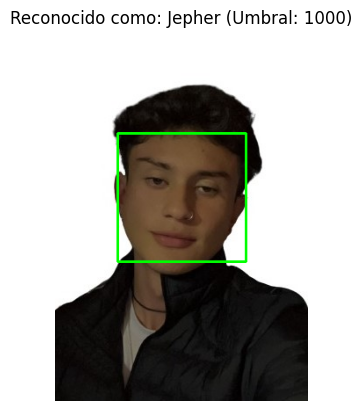

378.13520230376787


In [23]:
input_image = cv2.imread("/content/Reconocimiento_facial/Imagenes_Manual/Jepher1.jpg")
input_features = extract_features_manual(input_image)

# Realiza la comparación de características
best_match = None
best_similarity = float('inf')

for name, features_list in database.items():
    for features in features_list:
        similarity = np.linalg.norm(features - input_features)
        if similarity < best_similarity:
            best_similarity = similarity
            best_match = name

# umbral de decisión
threshold = 1000

if best_similarity < threshold:
    result_text = f"Reconocido como: {best_match} (Umbral: {threshold})"
else:
    result_text = f"No se pudo reconocer la persona (Umbral: {threshold})"

x, y, w, h = faces[0]
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

if len(faces) > 0:
    x, y, w, h = faces[0]
    cv2.rectangle(input_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title(result_text)
plt.axis('off')
plt.show()
print(best_similarity)

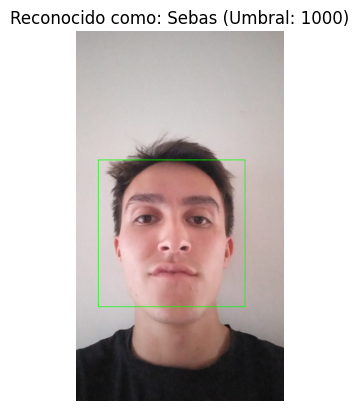

51.75613693927807


In [24]:
input_image = cv2.imread("/content/Reconocimiento_facial/Imagenes_Manual/Sebas2.jpg")
input_features = extract_features_manual(input_image)

# Realiza la comparación de características
best_match = None
best_similarity = float('inf')

for name, features_list in database.items():
    for features in features_list:
        similarity = np.linalg.norm(features - input_features)
        if similarity < best_similarity:
            best_similarity = similarity
            best_match = name

# umbral de decisión
threshold = 1000

if best_similarity < threshold:
    result_text = f"Reconocido como: {best_match} (Umbral: {threshold})"
else:
    result_text = f"No se pudo reconocer la persona (Umbral: {threshold})"

x, y, w, h = faces[0]
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

if len(faces) > 0:
    x, y, w, h = faces[0]
    cv2.rectangle(input_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title(result_text)
plt.axis('off')
plt.show()
print(best_similarity)